<center>
    <strong>PROYECTO FINAL DATASCIENCE: Segunda pre-entrega<br>
    </strong><br><br>
</center>
<p style="text-align:right;">
    Nombre alumno: Carlos Moreno Sánchez<br>
    Nombre tutor: Santiago Greloni<br>
    Nombre profesor: Walter Bernal<br>
    Institución: Coderhouse<br>
    Fecha entrega: 13-09-2023<br>
    



<center>
    <strong>Storytelling películas populares
    </strong>
</center>

¿Alguna vez te has preguntado qué tan rentable es dedicar tu vida a la industria del cine y crear un megaproyecto como el MCU?
Yo me hice esta pregunta porque me dedico al project management y porque me encantan las películas de marvel y se que hay millones de fanáticos en el mundo como yo, que quieren que este ciclo de historias y multiversos exista en el cine...¡Por mucho tiempo más!
Con el contenido que compartiré con ustedes, intentaré dar respuesta a esta entretenida e interesante pregunta.
A partir de un dataset obtenido de kaggle, donde se comparten las 10.000 (diez mil) películas más populares del cine, les mostraré que, teniendo un pequeño porcentaje del total de películas, los films de marvel se llevan gran parte de los presupuestos e ingresos totales de la muestra.

<strong>

Antes de saber si Marvel es un negocio rentable en el cine, debemos responder dos preguntas previas que nos llevarán a nuestro objetivo.


1. ¿Están relacionados de alguna manera los presupuestos de una película y sus ingresos?
2. ¿Está relacionada la productora de la película con las variables anteriores?
</strong>


In [3]:
#Para responder las preguntas anteriores, se inicia importando
#algunas de las bibliotecas que se utilizarán a lo largo de todo el proyecto

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

<strong>

Demos una mirada rápida a nuestros datos y, ¡enfoquémonos en la productora, los presupuestos y los ingresos!
</strong>

In [4]:
#Luego, damos paso a importar el dataset al notebook y mostramos parte del contenido

movies = pd.read_csv('C:/Users/56997/Desktop/Python/ProyectoDS_Primera entrega proyecto final_Carlos Moreno/popular_10000_movies_tmdb.csv')

movies.head()

,id,title,release_date,genres,original_language,vote_average,vote_count,popularity,overview,budget,production_companies,revenue,runtime,tagline
0,758323,The Pope's Exorcist,2023-04-05,"['Horror', 'Mystery', 'Thriller']",English,7.4,619,5089.969,"Father Gabriele Amorth, Chief Exorcist of the ...",18000000,"['Screen Gems', '2.0 Entertainment', 'Jesus & ...",65675816,103,Inspired by the actual files of Father Gabriel...
1,640146,Ant-Man and the Wasp: Quantumania,2023-02-15,"['Action', 'Adventure', 'Science Fiction']",English,6.6,2294,4665.438,Super-Hero partners Scott Lang and Hope van Dy...,200000000,"['Marvel Studios', 'Kevin Feige Productions']",464566092,125,Witness the beginning of a new dynasty.
2,502356,The Super Mario Bros. Movie,2023-04-05,"['Animation', 'Adventure', 'Family', 'Fantasy'...",English,7.5,1861,3935.550,"While working underground to fix a water main,...",100000000,"['Universal Pictures', 'Illumination', 'Ninten...",1121048165,92,NaN
3,868759,Ghosted,2023-04-18,"['Action', 'Comedy', 'Romance']",English,7.2,652,2791.532,Salt-of-the-earth Cole falls head over heels f...,0,"['Skydance Media', 'Apple Studios']",0,120,Finding that special someone can be a real adv...
4,594767,Shazam! Fury of the Gods,2023-03-15,"['Action', 'Comedy', 'Fantasy', 'Adventure']",English,6.8,1510,2702.593,"Billy Batson and his foster siblings, who tran...",125000000,"['New Line Cinema', 'The Safran Company', 'DC ...",133437105,130,Oh. My. Gods.


In [5]:
#Es importante conocer los tipos de datos que contiene el dataset,
#para tener claridad de cómo deben ser tratados

movies.dtypes

id                        int64
title                    object
release_date             object
genres                   object
original_language        object
vote_average            float64
vote_count                int64
popularity              float64
overview                 object
budget                    int64
production_companies     object
revenue                   int64
runtime                   int64
tagline                  object
dtype: object

In [6]:
#También será de utilidad tener algunas estadísticas básicas del dataset,
#tales como la media, el desvío estándar, la mediana.

movies.describe()

,id,vote_average,vote_count,popularity,budget,revenue,runtime
count,1.000000e+04,10000.000000,10000.00000,10000.000000,1.000000e+04,1.000000e+04,10000.000000
mean,3.152363e+05,6.326870,1526.84240,31.488241,1.950457e+07,5.976926e+07,100.029600
std,3.335982e+05,1.413969,2868.71462,111.444869,3.887137e+07,1.542951e+08,28.777188
min,5.000000e+00,0.000000,0.00000,7.219000,0.000000e+00,0.000000e+00,0.000000
25%,1.221950e+04,5.900000,122.00000,13.529000,0.000000e+00,0.000000e+00,90.000000
50%,1.968140e+05,6.500000,480.00000,17.615500,3.053035e+05,1.000000e+06,100.000000
75%,5.643672e+05,7.100000,1555.00000,27.159500,2.200000e+07,4.928871e+07,114.000000
max,1.119921e+06,10.000000,33633.00000,5089.969000,5.793304e+08,2.923706e+09,449.000000


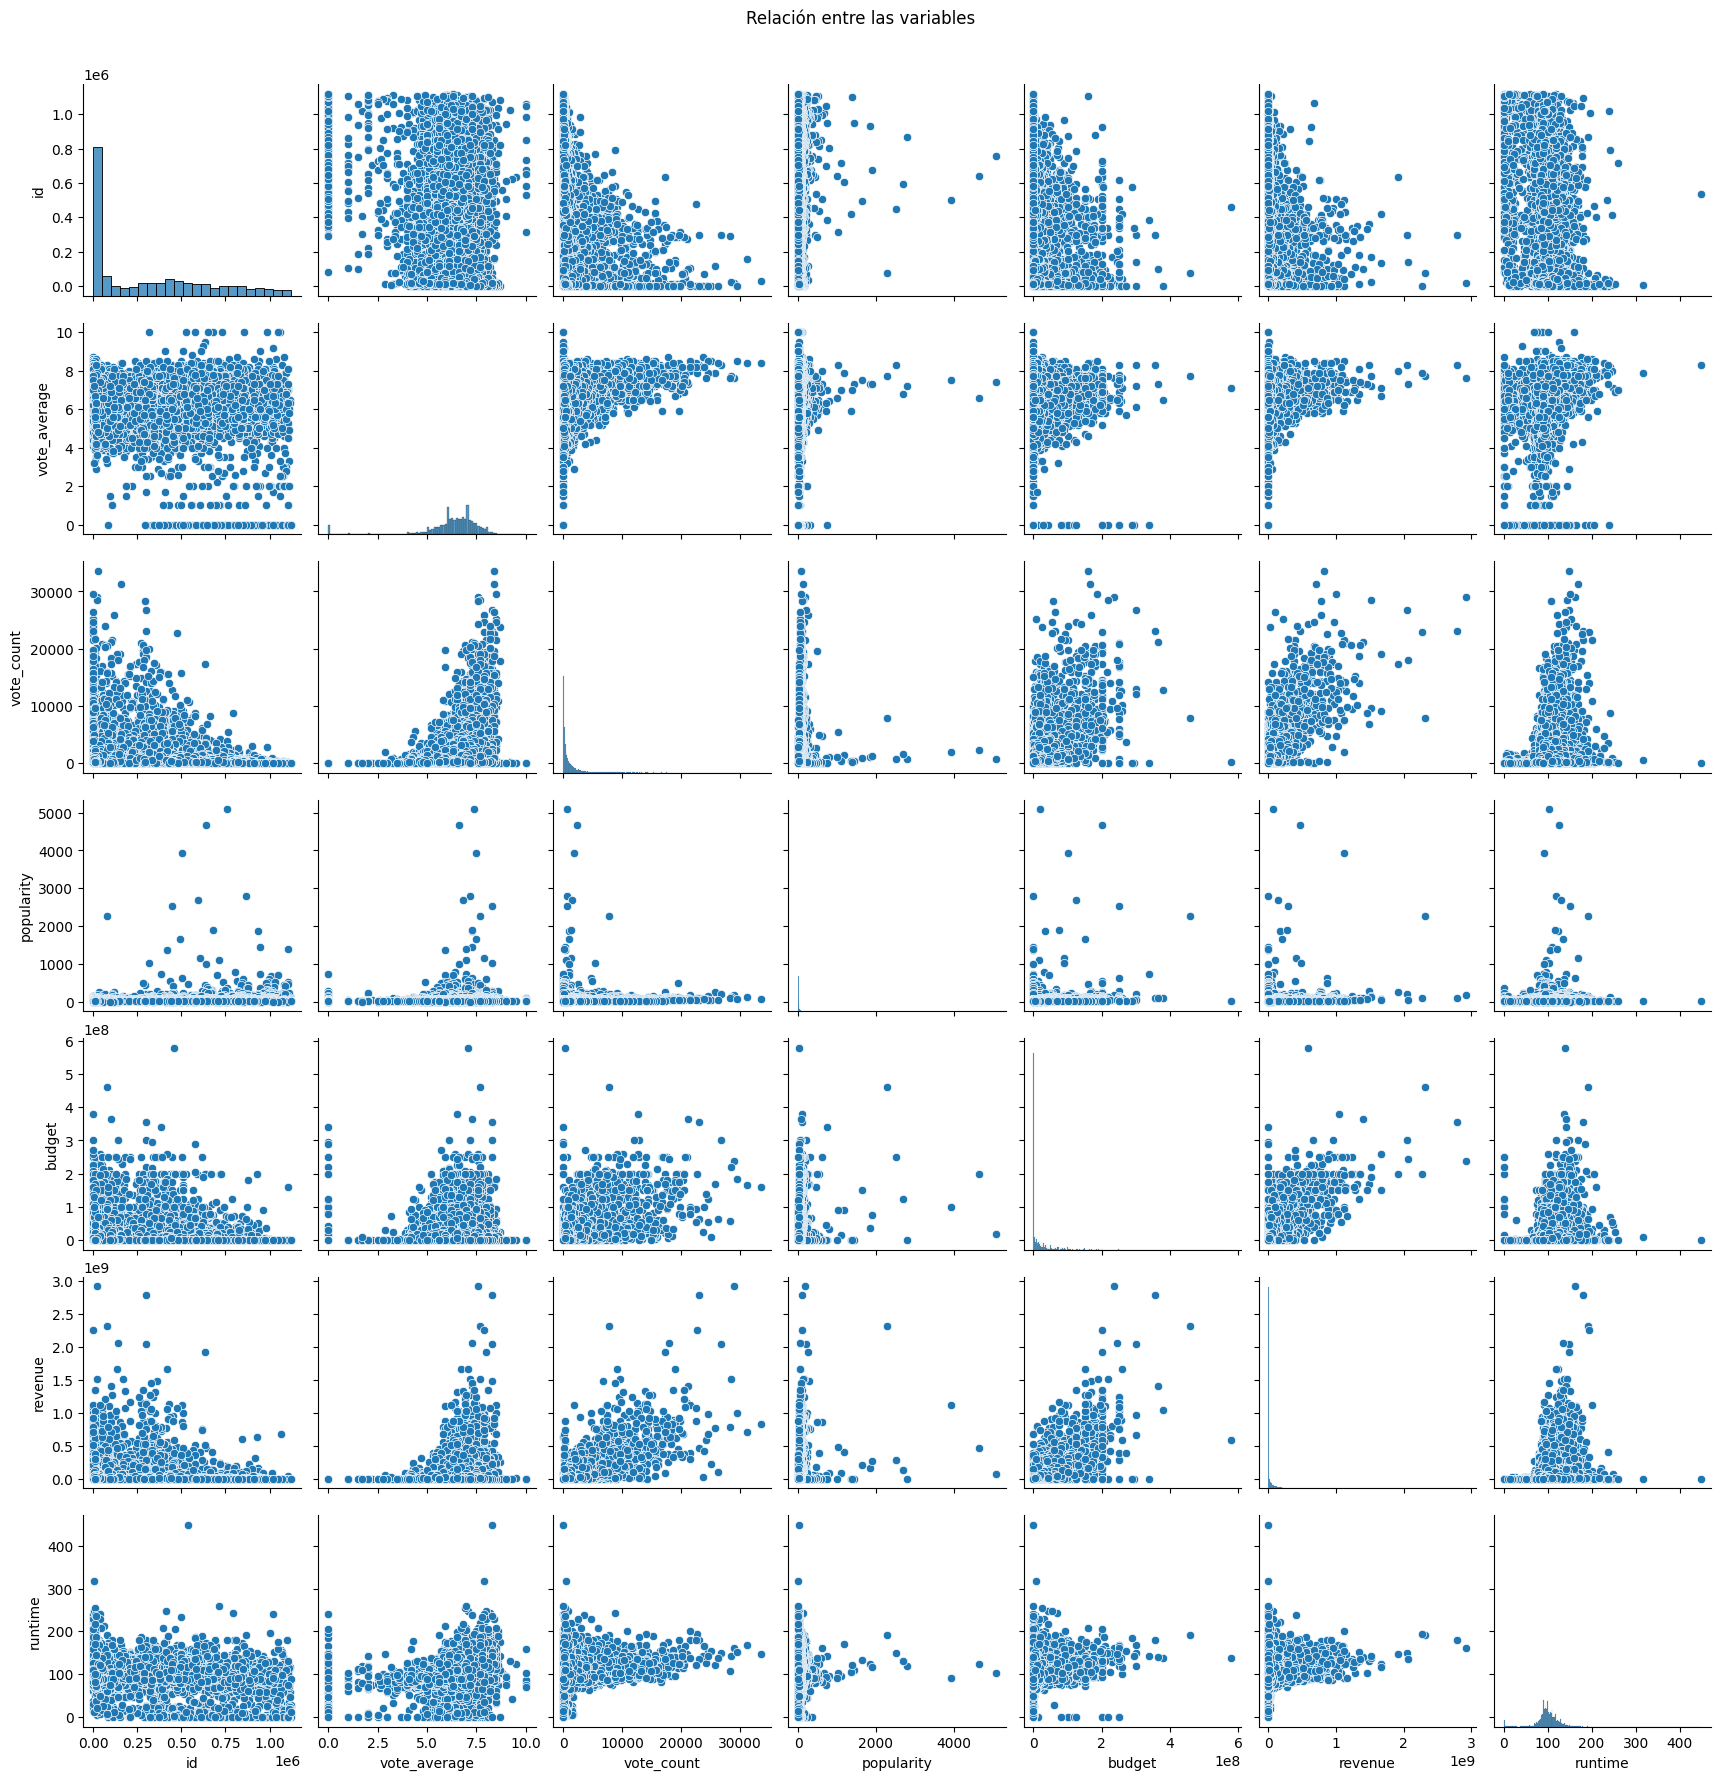

In [7]:
#Ahora, se generarán gráficos de dispersión,
#utilizando la biblioteca "seaborn", la cual se importó anteriormente.
#Esto nos permitirá realizar un "scan" rápido de los datos y ver cómo se relacionan entre distintas variables
g = sns.pairplot(movies)
g.fig.suptitle("Relación entre las variables", y=1.02)

plt.show()

Para este proyecto, en este pairplot nos interesa principalmente el gráfico budget v/s revenue, ya que responde a nuestra pregunta inicial "¿Están relacionados de alguna manera los presupuestos de una película y sus ingresos?"

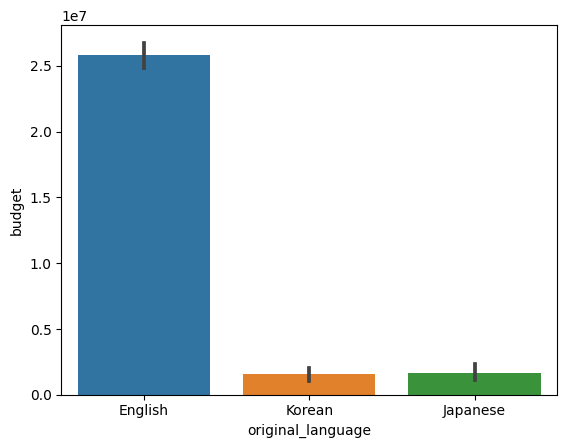

In [8]:
#Compararemos también, la inversión que se ha realizado
#en los distintos films categorizados por idioma original.
#No está directamente relacionado con las preguntas iniciales,
#pero es un análisis que consideraremos a futuro

top_languages = movies['original_language'].value_counts().nlargest(3).index

filtered_movies = movies[movies['original_language'].isin(top_languages)]

sns.barplot(data=filtered_movies, x="original_language", y="budget")

labels = filtered_movies['original_language'].unique()

plt.xticks(range(len(labels)), labels)

plt.show()

De manera esperada, la mayor inversión, con amplia mayoría, se encuentra en las películas de idioma original inglés.


<Figure size 1500x1000 with 0 Axes>

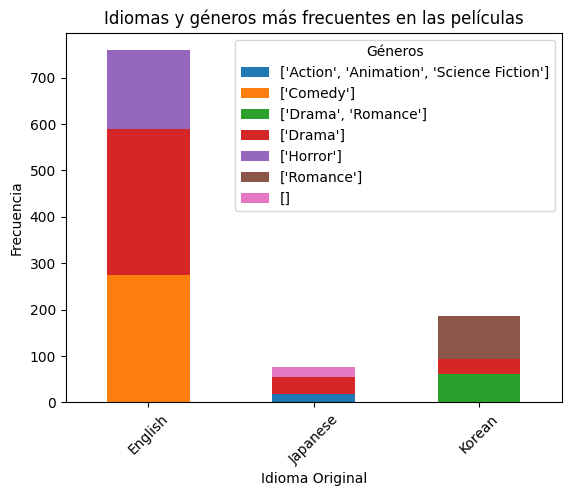

In [9]:
# Esta gráfica intenta "desmenuzar" los géneros de películas más utilizados entre las 10.000 películas del dataset

# Obtener los tres idiomas más frecuentes
top_languages = movies['original_language'].value_counts().nlargest(3).index.tolist()

# Filtrar el DataFrame para incluir solo los idiomas más frecuentes
filtered_movies = movies[movies['original_language'].isin(top_languages)]

# Obtener los tres géneros más frecuentes para cada idioma
top_genres_per_language = filtered_movies.groupby('original_language')['genres'].value_counts().groupby(level=0).nlargest(3).reset_index(level=0, drop=True)

# Crear una tabla de frecuencias de géneros por idioma original con los géneros más frecuentes
genre_counts_top = top_genres_per_language.unstack()

# Visualizar los resultados
plt.figure(figsize=(15, 10))
genre_counts_top.plot.bar(stacked=True)
plt.title("Idiomas y géneros más frecuentes en las películas")
plt.xlabel("Idioma Original")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)
plt.legend(title="Géneros", bbox_to_anchor=(1, 1))

plt.show()



En este gráfico se muestran los idiomas y géneros donde más se producen películas.
Esto puede ser un buen indicador para los productores o futuros productores de películas, para saber dónde invertir, dónde está la mayor competencia, cuáles son los géneros que se han desarrollado más y se tienen más conocimientos, etc.
En mi conclusión, siempre el idioma inglés se lleva todos los números y quizás es la mejor opción para un cineasta para comenzar su carrera internacional.

Para llegar a la luz al final del túnel, revisaremos qué géneros de películas son los más "producidos" por la industria!

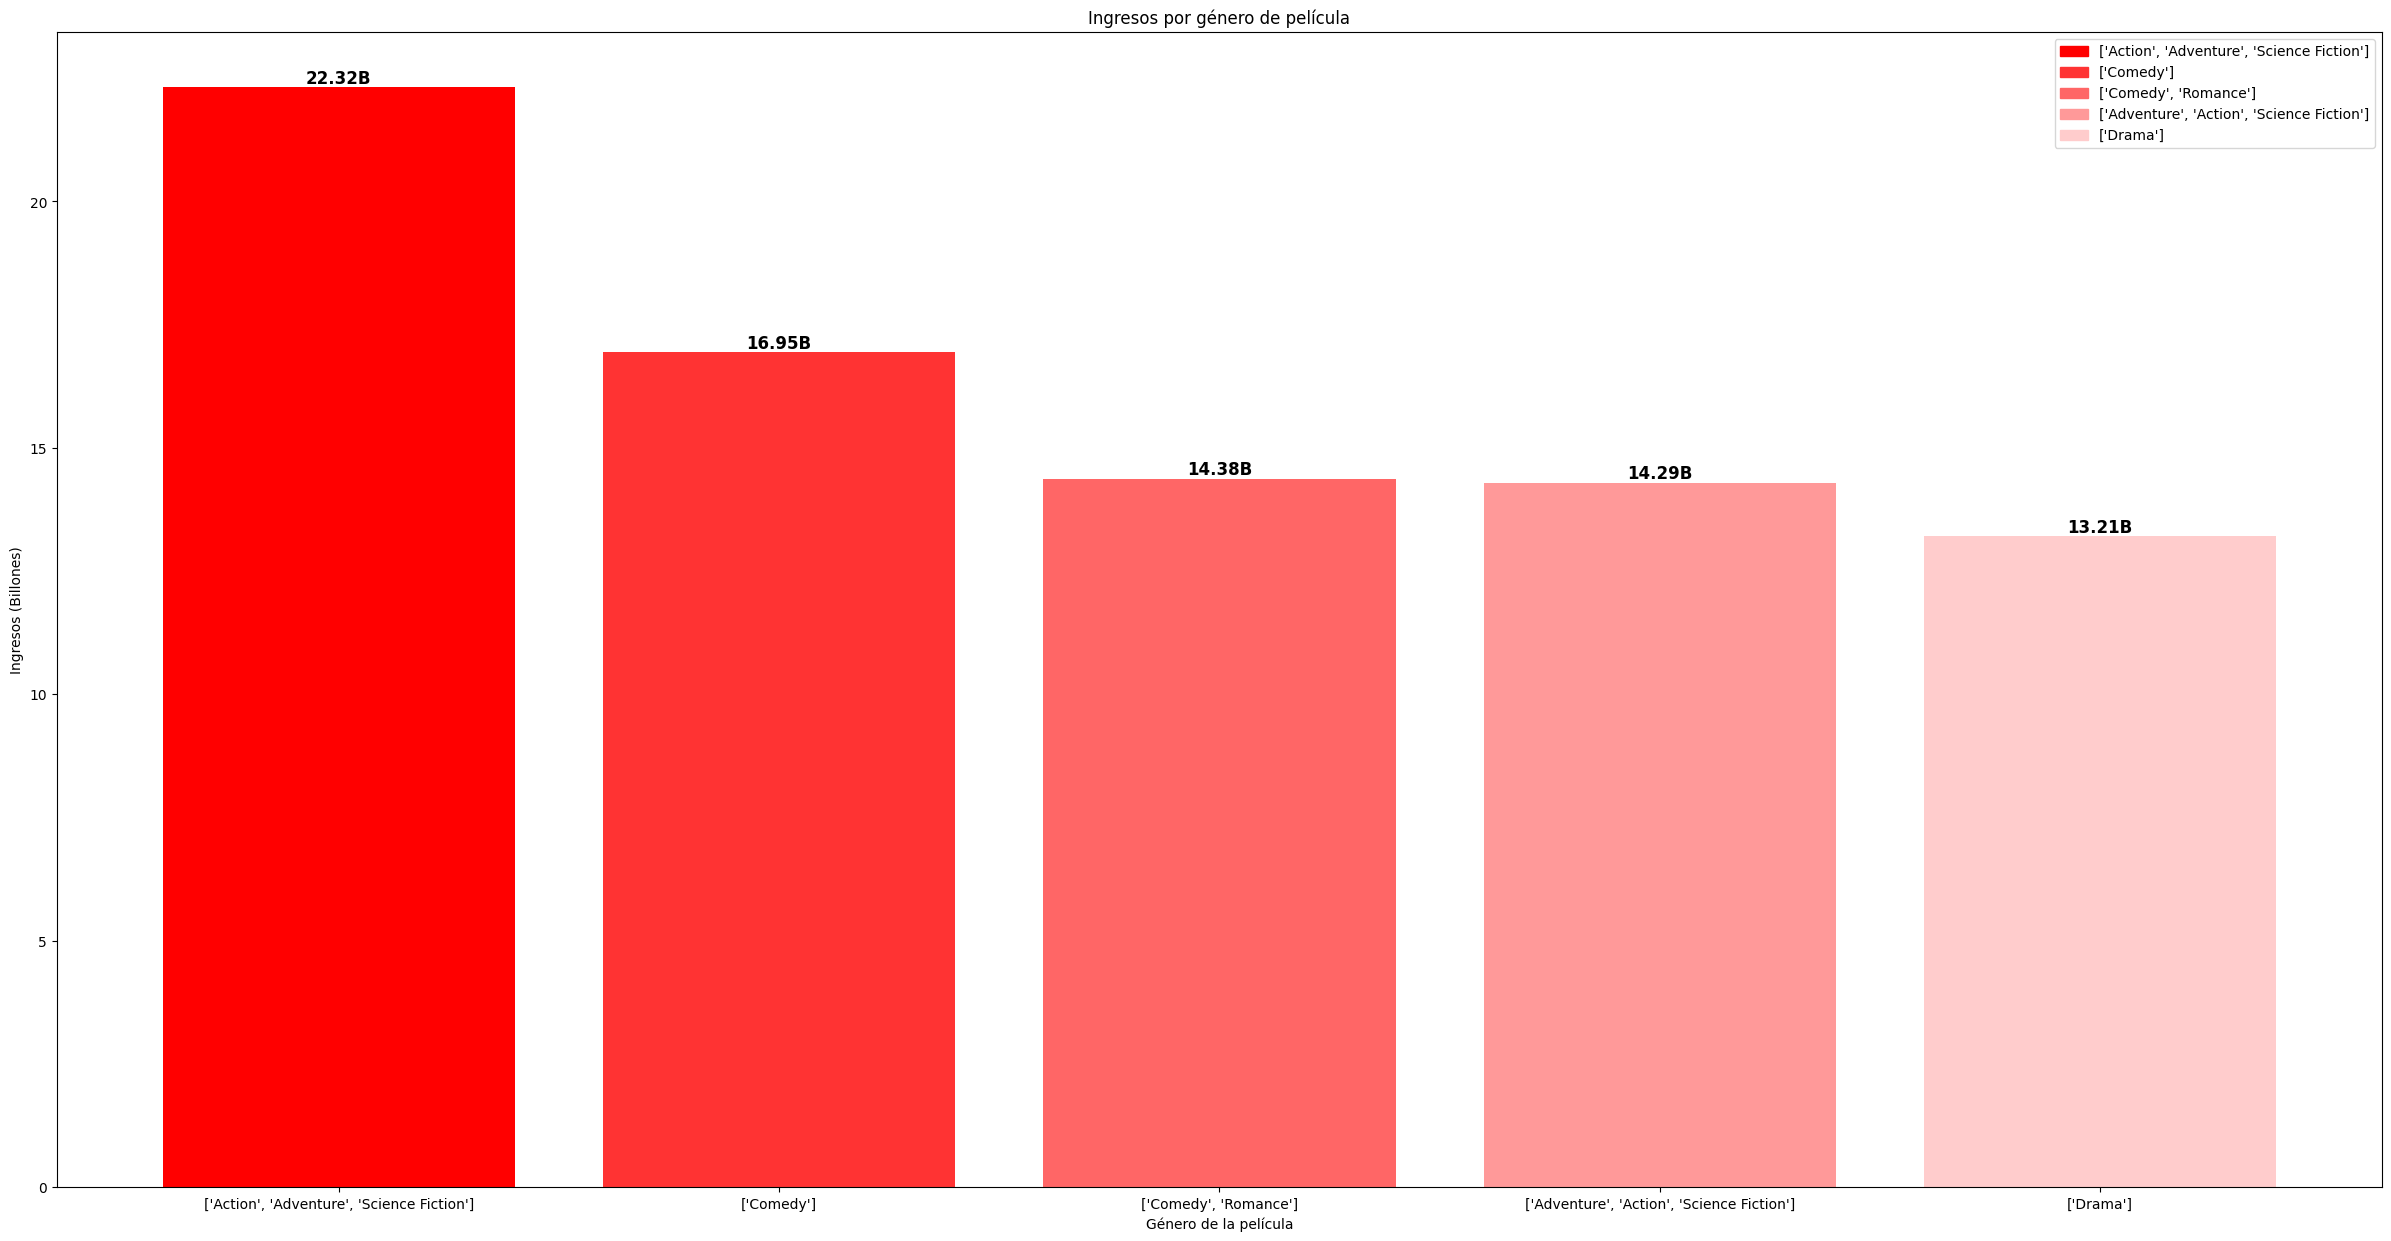

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches
import colorsys
import matplotlib.colors

revenue_by_genres = movies.groupby('genres')['revenue'].sum().sort_values(ascending=False)
top_5_genres = revenue_by_genres.head(5)

fig, ax = plt.subplots(figsize=(30, 15))

highlight_color = 'red'

num_colors = len(top_5_genres)
base_color = colorsys.rgb_to_hsv(*matplotlib.colors.to_rgba(highlight_color)[:3])
colors = [matplotlib.colors.to_hex(colorsys.hsv_to_rgb(base_color[0], base_color[1] - i * 0.2, base_color[2])) for i in range(num_colors)]

bar_chart = ax.bar(top_5_genres.index, top_5_genres.values / 1e9, color=colors)  # Dividir por 1,000 millones

ax.set_xlabel('Género de la película')
ax.set_ylabel('Ingresos (Billones)')
ax.set_title('Ingresos por género de película')

handles = []

for i, genre in enumerate(top_5_genres.index):
    patch = mpatches.Patch(color=colors[i], label=genre)
    handles.append(patch)

# Agregar etiquetas de datos sobre las barras en billones
for i, value in enumerate(top_5_genres.values):
    ax.text(i, value / 1e9, f'{value / 1e9:.2f}B', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.legend(handles=handles, loc='upper right', bbox_to_anchor=(1, 1))

plt.show()

Ya puedes darte cuenta que el género de ciencia ficción es que aparece más en el mundo de las 10.000 películas más populares. Y qué películas están dentro de ese género? Ya encontraste la respuesta, verdad? Para ayudarte, veamos la siguiente gráfica que muestra los ingresos de las empresas "top 5" de la industria.

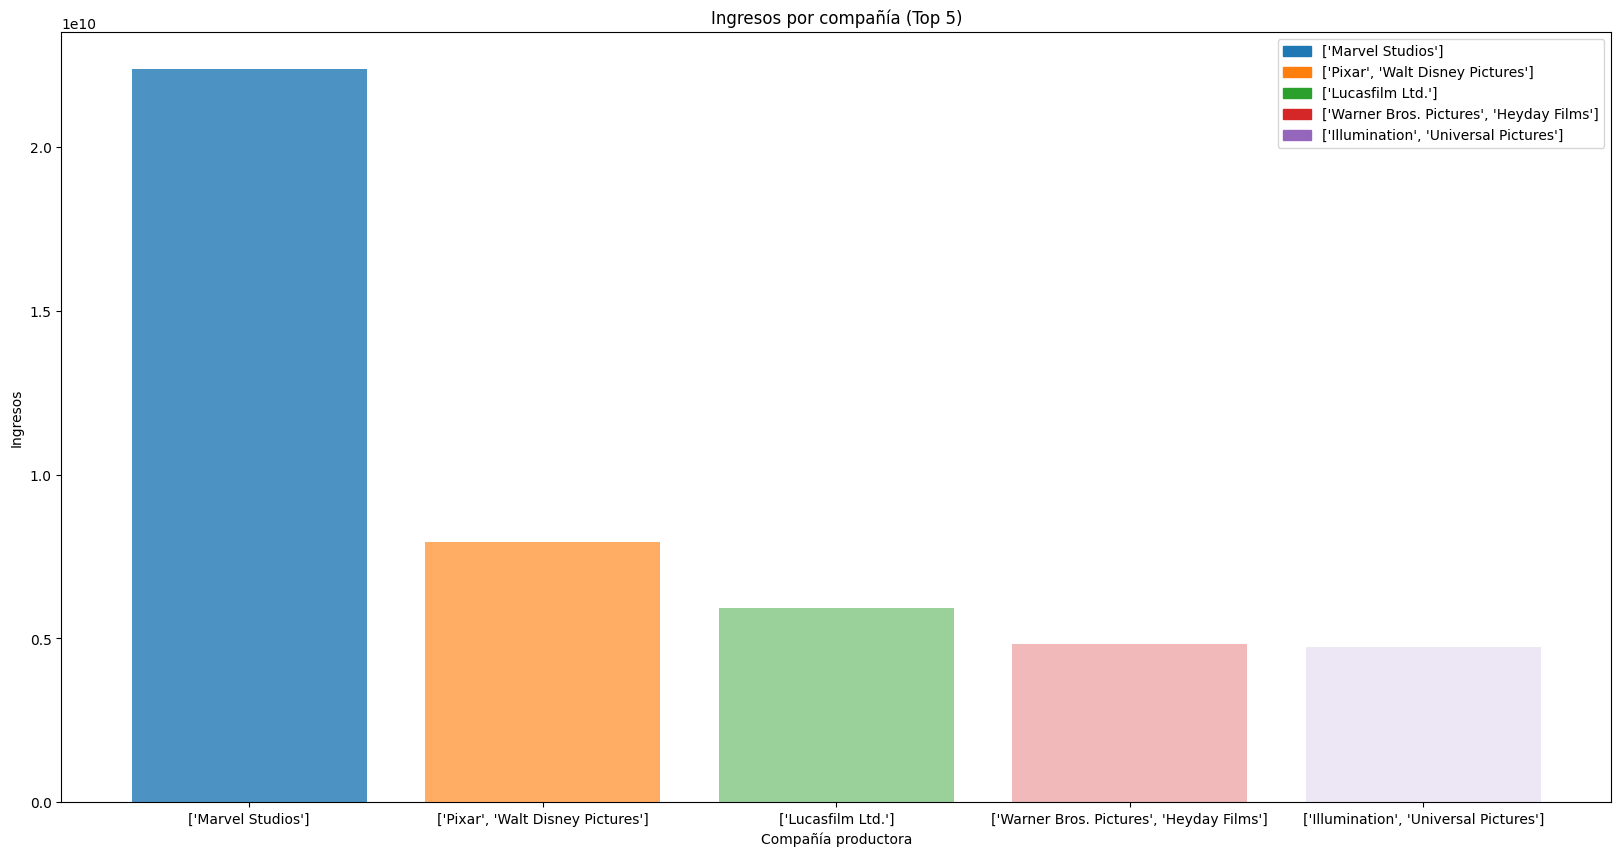

In [11]:
#Ahora, procederemos a evaluar a las empresas con mayores ingresos,
#intentando responder nuestra segunda pregunta

import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches
import colorsys
import matplotlib.colors

revenue_by_companies = movies.groupby('production_companies')['revenue'].sum().sort_values(ascending=False)
top_5_companies = revenue_by_companies.head(5)

fig, ax = plt.subplots(figsize=(20, 10))

# Definiremos un valor constante para ir haciendo transparentes los datos hacia la derecha
alpha = 0.8

# Crearemos una lista de colores con transparencias ajustadas
num_companies = len(top_5_companies)
colors = [f'C{i}' for i in range(num_companies)]

bar_chart = ax.bar(top_5_companies.index, top_5_companies.values, color=colors)

# Ajustaremos la transparencia para cada barra en función de su posición en el gráfico
for i, bar in enumerate(bar_chart):
    bar.set_alpha(alpha * (1 - i / num_companies))

ax.set_xlabel('Compañía productora')
ax.set_ylabel('Ingresos')
ax.set_title('Ingresos por compañía (Top 5)')

handles = []
for i, companies in enumerate(top_5_companies.index):
    patch = mpatches.Patch(color=colors[i], label=companies)
    handles.append(patch)

plt.legend(handles=handles, loc='upper right')

plt.show()

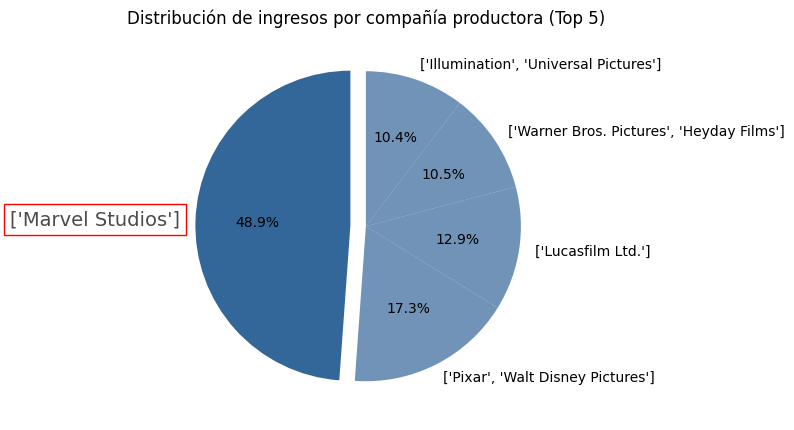

In [12]:
#Para profundizar un poco más en lo anterior,
#veremos cuál es el peso de las compañías más importantes en la distribución de ingresos

import matplotlib.pyplot as plt
import pandas as pd

revenue_by_companies = movies.groupby('production_companies')['revenue'].sum().sort_values(ascending=False)
top_5_companies = revenue_by_companies.head(5)

max_percent_company = top_5_companies.idxmax()

explode = [0.1 if company == max_percent_company else 0 for company in top_5_companies.index]

colors = [(0.2, 0.4, 0.6, 1.0) if company == max_percent_company else (0.2, 0.4, 0.6, 0.7) for company in top_5_companies.index]

fig, ax = plt.subplots(figsize=(5, 10))

pie_chart, labels, percentages = ax.pie(top_5_companies.values, labels=top_5_companies.index, autopct='%1.1f%%', startangle=90, explode=explode, colors=colors)

ax.set_title('Distribución de ingresos por compañía productora (Top 5)')

for label, percent in zip(labels, percentages):
    if label.get_text() == max_percent_company:
        label.set_fontsize(14)
        label.set_bbox({'boxstyle': 'square,pad=0.3', 'edgecolor': 'red', 'facecolor': 'none'})
        label.set_alpha(0.7)
    else:
        label.set_fontsize(10)
        label.set_alpha(1.0)

plt.show()

**Este gráfico es un complemento del anterior, ya que muestra también los ingresos de las compañias productoras más "potentes", pero en una torta que muestra los % que se lleva cada una en cuanto a ingresos.
Pero, ¿cómo ayuda esto a responder nuestra primera pregunta?
Lo averiguaremos en la siguiente visualización**

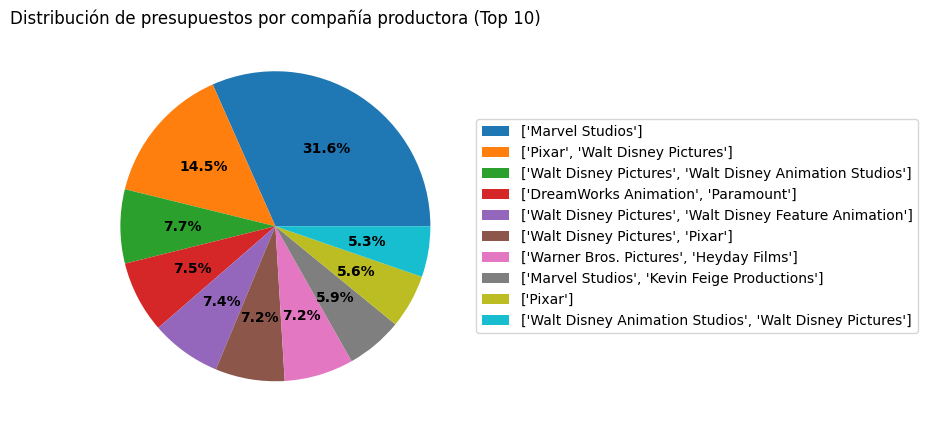

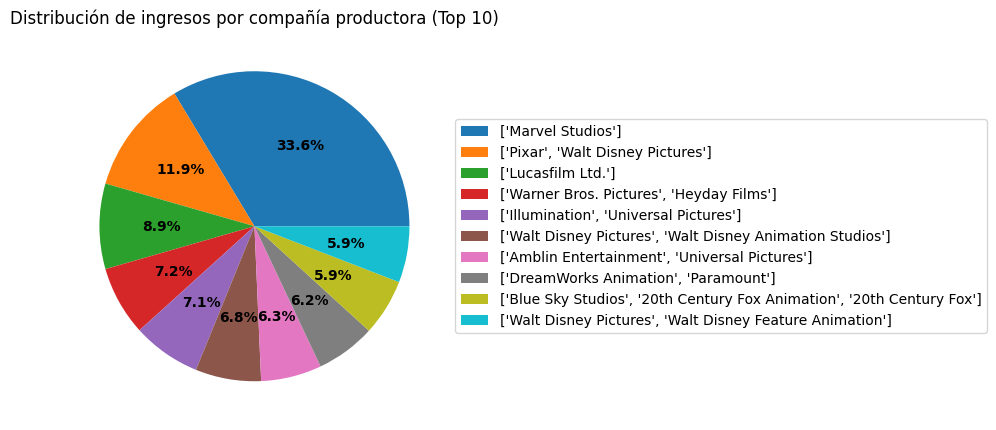

In [18]:
import matplotlib.pyplot as plt

def format_percent(pct):
    return f'{pct:.1f}%'

# Presupuestos de las empresas top 10
budget_by_companies = movies.groupby('production_companies')['budget'].sum().sort_values(ascending=False)
top_10_companies = budget_by_companies.head(10)

fig, ax = plt.subplots(figsize=(5, 10))
values = top_10_companies.values
labels = top_10_companies.index
pie_chart = ax.pie(values, autopct=format_percent, textprops={'weight': 'bold'})

ax.set_title('Distribución de presupuestos por compañía productora (Top 10)')
ax.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

# Ingresos de las empresas top 10
revenue_by_companies = movies.groupby('production_companies')['revenue'].sum().sort_values(ascending=False)
top_10_companies = revenue_by_companies.head(10)

fig, ax = plt.subplots(figsize=(5, 10))
values = top_10_companies.values
labels = top_10_companies.index
pie_chart = ax.pie(values, autopct=format_percent, textprops={'weight': 'bold'})

ax.set_title('Distribución de ingresos por compañía productora (Top 10)')
ax.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

Dentro del top 10 de compañías productoras, Marvel percibe más del 30% de los ingresos del subtotal mostrado en el gráfico de torta. Y además, con un poco más de 4.800 millones de inversión, consiguen un ingreso de más de 22 mil millones! Es un negocio tremendo!
Finalmente, quiero mostrarte esta diferencia abismal en esta y otras compañías.

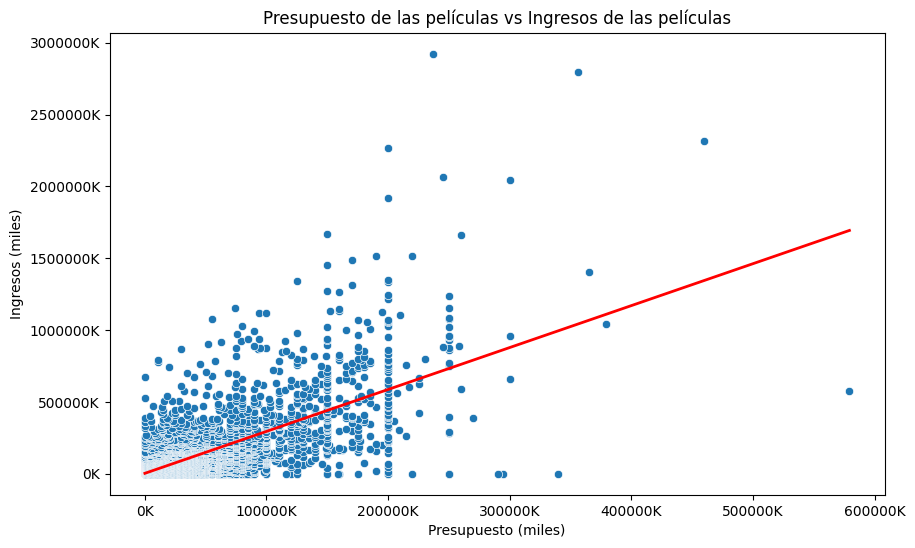

In [14]:
#Se reforzará la hipótesis con un gráfico de dispersión

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Ordenar el DataFrame por calificación promedio de forma descendente
movies_sorted = movies.sort_values(by='revenue')

# Orden de los datos
movies_sorted['budget'] = movies_sorted['budget'].astype(float)
movies_sorted['revenue'] = movies_sorted['revenue'].astype(float)

# Ajustar una línea recta a los datos
coefficients = np.polyfit(movies_sorted['budget'], movies_sorted['revenue'], 1)
a = coefficients[0]  # Pendiente
b = coefficients[1]  # Término independiente

# Crear la función lineal y = ax + b
x = np.linspace(movies_sorted['budget'].min(), movies_sorted['budget'].max(), 100)
y = a * x + b


# Crear una visualización de dispersión de duración vs calificación promedio
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(data=movies_sorted, x='budget', y='revenue')

# Formatear los ejes con unidades en miles
ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: '{:.0f}K'.format(x/1000)))
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda y, pos: '{:.0f}K'.format(y/1000)))

plt.plot(x, y, color='red', linewidth=2)
plt.title("Presupuesto de las películas vs Ingresos de las películas")
plt.xlabel("Presupuesto (miles)")
plt.ylabel("Ingresos (miles)")

plt.show()

Al visualizar el gráfico, se puede apreciar un poco más una proporcionalidad directa entre presupuestos e ingresos.
Para profundizar un poco más en esto, se tomarán las compañías productoras "top 10" en cuanto a presupuestos e ingresos y se compararán en gráficos de tortas y en un gráfico de barras para saber si existe alguna relación entre ambas, cuando se les compara con otro parámetro.

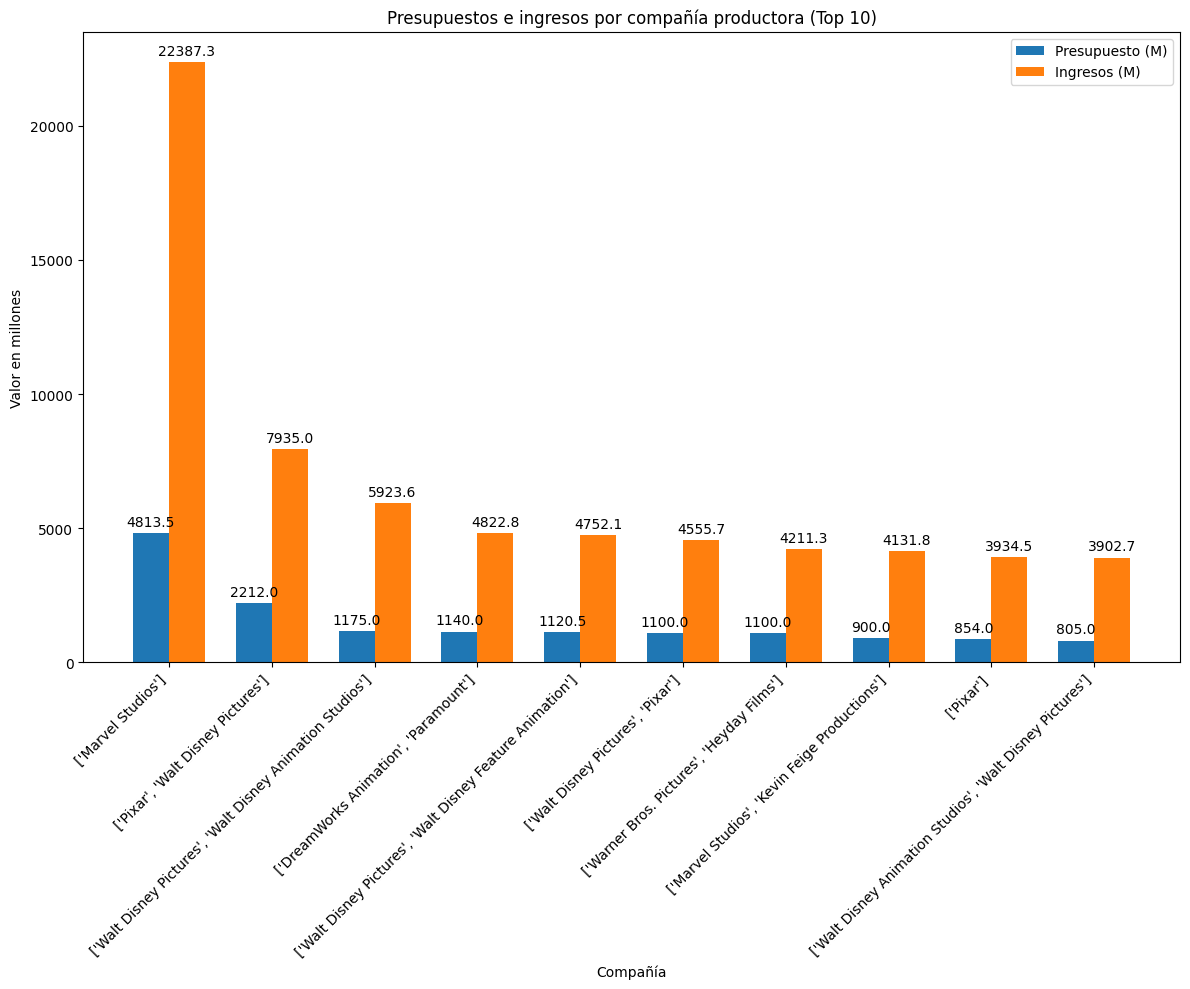

In [15]:
#Gráfico de barras que compare presupuestos e ingresos del top 10 de compañías productoras
budget_by_companies = movies.groupby('production_companies')['budget'].sum().sort_values(ascending=False)
top_10_companies_budget = budget_by_companies.head(10)

revenue_by_companies = movies.groupby('production_companies')['revenue'].sum().sort_values(ascending=False)
top_10_companies_revenue = revenue_by_companies.head(10)

fig, ax = plt.subplots(figsize=(12, 10))
x = np.arange(len(top_10_companies_budget))
bar_width = 0.35

rects1 = ax.bar(x - bar_width/2, top_10_companies_budget.values / 1e6, bar_width, label='Presupuesto (M)')

rects2 = ax.bar(x + bar_width/2, top_10_companies_revenue.values / 1e6, bar_width, label='Ingresos (M)')

ax.set_title('Presupuestos e ingresos por compañía productora (Top 10)')
ax.set_xlabel('Compañía')
ax.set_ylabel('Valor en millones')
ax.set_xticks(x)
ax.set_xticklabels(top_10_companies_budget.index, rotation=45, ha='right')
ax.legend()

# Agregar etiquetas de valores en las barras
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.1f}', xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3),
                    textcoords="offset points", ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()

Qué te parece el negocio de Marvel Studios? 

Se plantearon algunas hipótesis adicionales con respecto al dataset :

3.   El género de una película tiene un impacto significativo en su popularidad (medida por el valor de "popularity" en el dataset). Se espera que las películas de ciertos géneros tengan una mayor popularidad en comparación con otros géneros.

4.   La duración de una película afecta su calificación promedio.

Las cuales serán analizadas de manera superficial, ya que se escogió continuar finalmente con las preguntas planteadas inicialmente en el abstract.

Se analizará la hipótesis n°4.
El siguiente código, mostrará un gráfico de dispersión que compara las duraciones de las películas del dataset con su calificación promedio.

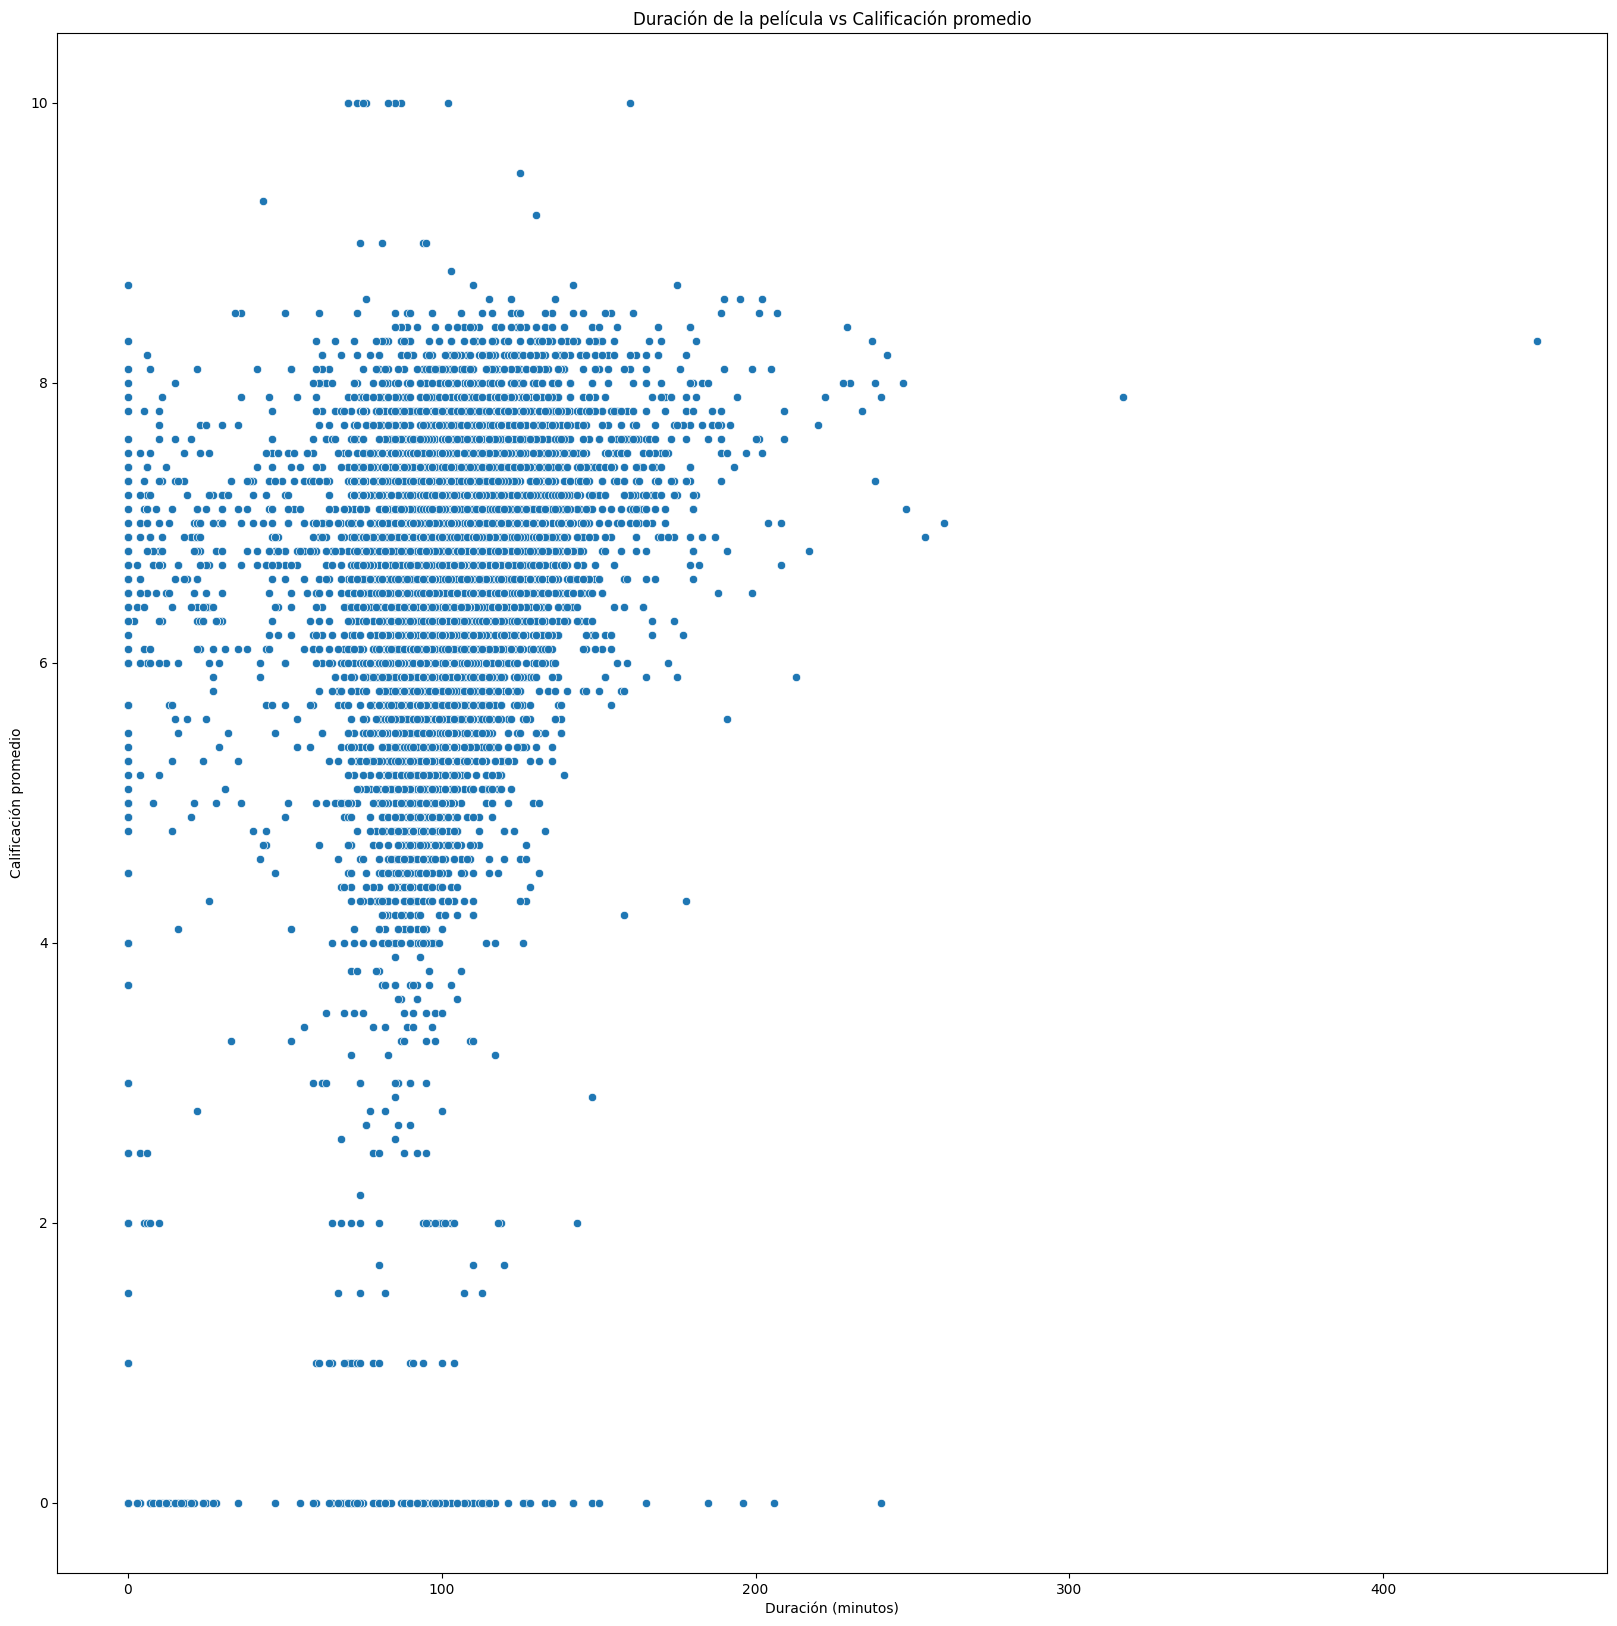

In [16]:
# Ordenar el DataFrame por calificación promedio de forma descendente
movies_sorted = movies.sort_values(by='vote_average')

# Crear una visualización de dispersión de duración vs calificación promedio
plt.figure(figsize=(20, 20))
sns.scatterplot(data=movies_sorted, x='runtime', y='vote_average')
plt.title("Duración de la película vs Calificación promedio")
plt.xlabel("Duración (minutos)")
plt.ylabel("Calificación promedio")
plt.show()

In [17]:
def obtener_top_valores(dataframe, columna, n):
    dataframe[columna] = pd.to_numeric(dataframe[columna], errors='coerce')
    dataframe = dataframe.dropna(subset=[columna])  # Eliminar filas con valores no numéricos
    top_valores = dataframe.nlargest(n, columna)
    return top_valores

top_valores = obtener_top_valores(movies, "vote_average", 5)
print("Los 5 valores máximos de vote_average son:")
print(top_valores["vote_average"])

Los 5 valores máximos de vote_average son:
337     10.0
483     10.0
939     10.0
1656    10.0
4664    10.0
Name: vote_average, dtype: float64


Debido a la gran dispersión de los datos, sobretodo en las calificaciones para las duraciones menores a 100 minutos y mayores a 200 minutos, se realizará una limpieza de los datos, para considerar solamente "los datos centrales" de la muestra y ajustarlos a una función lineal y= ax + b.
Para esto, se utilizará el método de Tukey, utilizando los cuartiles Q1 y Q3 (no considerando en el análisis los datos que están por debajo del percentil 25 y por sobre del percentil 75).

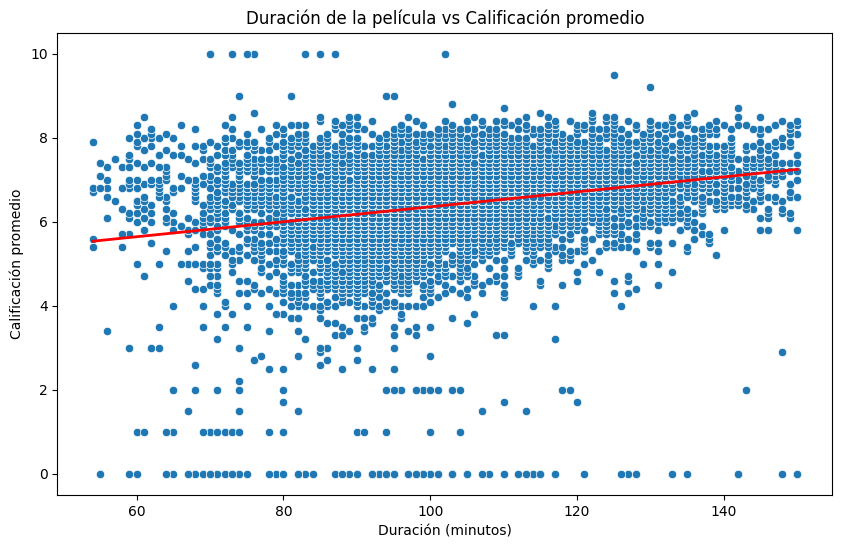

In [18]:
# Ordenar el DataFrame por calificación promedio de forma descendente
movies_sorted = movies.sort_values(by='vote_average')

# Limpieza de datos
movies_sorted['runtime'] = movies_sorted['runtime'].astype(float)
movies_sorted['vote_average'] = movies_sorted['vote_average'].astype(float)

# Eliminar valores atípicos usando el método de Tukey
Q1 = movies_sorted['runtime'].quantile(0.25)
Q3 = movies_sorted['runtime'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
movies_filtered = movies_sorted[(movies_sorted['runtime'] >= lower_bound) & (movies_sorted['runtime'] <= upper_bound)]

# Ajustar una línea recta a los datos filtrados
coefficients = np.polyfit(movies_filtered['runtime'], movies_filtered['vote_average'], 1)
a = coefficients[0]  # Pendiente
b = coefficients[1]  # Término independiente

# Crear la función lineal y = ax + b
x = np.linspace(movies_filtered['runtime'].min(), movies_filtered['runtime'].max(), 100)
y = a * x + b

# Crear una visualización de dispersión de duración vs calificación promedio
plt.figure(figsize=(10, 6))
sns.scatterplot(data=movies_filtered, x='runtime', y='vote_average')
plt.plot(x, y, color='red', linewidth=2)
plt.title("Duración de la película vs Calificación promedio")
plt.xlabel("Duración (minutos)")
plt.ylabel("Calificación promedio")

plt.show()


Como se puede apreciar, la dispersión incluso en los datos centrales es demasiada. Podríamos calcular el error con el método de los mínimos cuadrados, pero se concluirá prematuramente que la suma de los errores será muy alta y que la comparación de datos no cumple con los criterios para el análisis deseado.

**Recomendaciones basadas en los insights observados**

Repasemos las preguntas y respondamos en una breve reseña a ellas:​

¿Están relacionados de alguna manera los presupuestos de una película y sus ingresos?​

    Para el caso de nuestro universo estudiado, sí. Pudimos comprobar que había una proporcionalidad directa entre los ingresos y las inversiones.​

¿Está relacionada la productora de la película con las variables anteriores?​

    Al incorporar a nuestra pregunta anterior las compañías productoras, es más clara la relación entre los ingresos y los presupuestos. Determinamos que la razón de crecimiento entre ambas variables era de 4:1 (el ingreso es 4 veces lo invertido)​

Te invito a seguir estudiando sobre el mundo de las películas y sus inversiones y si tienes interés en comenzar a rodar tus propias películas, ya sabes lo que puede llegar a producir un éxito como los de las grandes compañías!​

In [21]:
import sklearn
from scipy.stats import norm
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, RobustScaler, StandardScaler

movies_filt = movies[['production_companies', 'title', 'genres', 'original_language', 'budget', 'revenue', 'popularity', 'vote_average']]
movies_filt.head()

,production_companies,title,genres,original_language,budget,revenue,popularity,vote_average
0,"['Screen Gems', '2.0 Entertainment', 'Jesus & ...",The Pope's Exorcist,"['Horror', 'Mystery', 'Thriller']",English,18000000,65675816,5089.969,7.4
1,"['Marvel Studios', 'Kevin Feige Productions']",Ant-Man and the Wasp: Quantumania,"['Action', 'Adventure', 'Science Fiction']",English,200000000,464566092,4665.438,6.6
2,"['Universal Pictures', 'Illumination', 'Ninten...",The Super Mario Bros. Movie,"['Animation', 'Adventure', 'Family', 'Fantasy'...",English,100000000,1121048165,3935.550,7.5
3,"['Skydance Media', 'Apple Studios']",Ghosted,"['Action', 'Comedy', 'Romance']",English,0,0,2791.532,7.2
4,"['New Line Cinema', 'The Safran Company', 'DC ...",Shazam! Fury of the Gods,"['Action', 'Comedy', 'Fantasy', 'Adventure']",English,125000000,133437105,2702.593,6.8


**A continuación, se realizarán algunas transformaciones que permitirán entrenar al modelo.
 - Los idiomas de las películas se dividirán en **English** = 1 y los otros idiomas = 0
 - Los géneros de las películas serán **'Action', 'Adventure', 'Science Fiction'** = 1 y los otros géneros = 0
 - Las compañías productoras se dividirán en **'Marvel Studios'** = 1 y las otras compañías = 0

In [22]:
# Comenzaremos utilizando la función np.where de numpy para crear una nueva columna
# que identifique si el idioma de una película es 'English' o no lo es.
movies_filt.loc[movies_filt['original_language'] == 'English', 'is_english'] = 1
movies_filt.loc[movies_filt['original_language'] != 'English', 'is_english'] = 0

# Ahora, haremos lo mismo para el género de acción, aventuras y ciencia ficción.
movies_filt.loc[movies_filt['genres'] == "['Action', 'Adventure', 'Science Fiction']", 'is_action'] = 1
movies_filt.loc[movies_filt['genres'] != "['Action', 'Adventure', 'Science Fiction']", 'is_action'] = 0

# Finalmente, haremos el mismo proceso para la Marvel Studios.
movies_filt.loc[movies_filt['production_companies'].str.contains('Marvel'), 'is_marvel'] = 1
movies_filt.loc[~movies_filt['production_companies'].str.contains('Marvel'), 'is_marvel'] = 0

movies_filt.head()

C:\Users\56997\AppData\Local\Temp\ipykernel_23176\45535969.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_filt.loc[movies_filt['original_language'] == 'English', 'is_english'] = 1
C:\Users\56997\AppData\Local\Temp\ipykernel_23176\45535969.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_filt.loc[movies_filt['genres'] == "['Action', 'Adventure', 'Science Fiction']", 'is_action'] = 1
C:\Users\56997\AppData\Local\Temp\ipykernel_23176\45535969.py:11: SettingWithCopyWarning: 
A value is try

,production_companies,title,genres,original_language,budget,revenue,popularity,vote_average,is_english,is_action,is_marvel
0,"['Screen Gems', '2.0 Entertainment', 'Jesus & ...",The Pope's Exorcist,"['Horror', 'Mystery', 'Thriller']",English,18000000,65675816,5089.969,7.4,1.0,0.0,0.0
1,"['Marvel Studios', 'Kevin Feige Productions']",Ant-Man and the Wasp: Quantumania,"['Action', 'Adventure', 'Science Fiction']",English,200000000,464566092,4665.438,6.6,1.0,1.0,1.0
2,"['Universal Pictures', 'Illumination', 'Ninten...",The Super Mario Bros. Movie,"['Animation', 'Adventure', 'Family', 'Fantasy'...",English,100000000,1121048165,3935.550,7.5,1.0,0.0,0.0
3,"['Skydance Media', 'Apple Studios']",Ghosted,"['Action', 'Comedy', 'Romance']",English,0,0,2791.532,7.2,1.0,0.0,0.0
4,"['New Line Cinema', 'The Safran Company', 'DC ...",Shazam! Fury of the Gods,"['Action', 'Comedy', 'Fantasy', 'Adventure']",English,125000000,133437105,2702.593,6.8,1.0,0.0,0.0


In [23]:
def normalize (movies):
    result = movies_filt.copy()
    for feature_name in movies_filt.columns:
        max_val = movies_filt[feature_name].max()
        min_val = movies_filt[feature_name].min()
        result[feature_name] = (movies_filt[feature_name] - min_val)/(max_val - min_val)

    return result


In [24]:
from sklearn.preprocessing import normalize

numeric_columns = movies_filt[['is_english', 'is_action', 'is_marvel', 'budget', 'revenue', 'popularity', 'vote_average']].select_dtypes(include='number')
m_norm = normalize(numeric_columns.iloc[:, 3:])  # Seleccionar solo las columnas numéricas para la normalización
m_norm = pd.DataFrame(m_norm, columns=numeric_columns.columns[3:])  # Utilizar solo las columnas numéricas para los nombres de las columnas en el DataFrame final

m_norm = pd.concat([numeric_columns.iloc[:, :3], m_norm], axis=1)  # Concatenar las columnas no normalizadas con las columnas normalizadas
m_norm.head()

,is_english,is_action,is_marvel,budget,revenue,popularity,vote_average
0,1.0,0.0,0.0,0.264326,0.964433,0.000075,1.086672e-07
1,1.0,1.0,1.0,0.395422,0.918499,0.000009,1.304894e-08
2,1.0,0.0,0.0,0.088849,0.996045,0.000003,6.663708e-09
3,1.0,0.0,0.0,0.000000,0.000000,0.999997,2.579220e-03
4,1.0,0.0,0.0,0.683658,0.729803,0.000015,3.719099e-08


Ahora, pasaremos al modelado de los datos.
Comenzaremos con decision tree

Exactitud del modelo con 'accuracy': 0.69


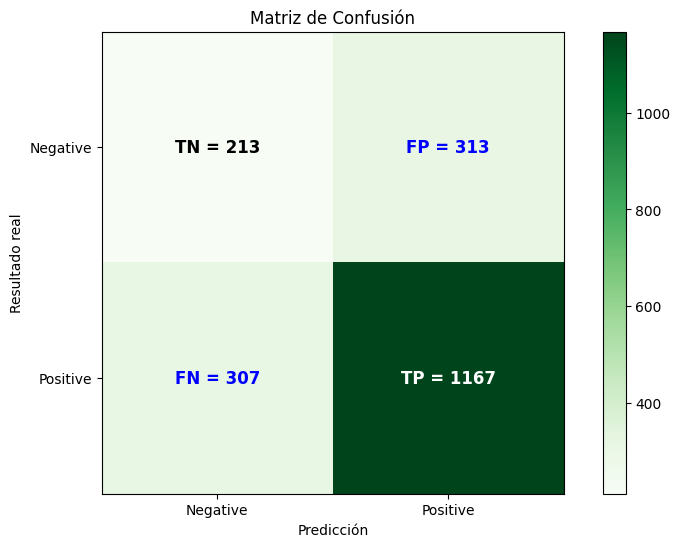

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Se utilizará como "X" todas las variables excepto 'is_english'
X = m_norm.drop('is_english', axis=1)
y = m_norm['is_english']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Exactitud del modelo con 'accuracy':", accuracy)

# Ahora, para visualizar nuestros resultados, utilizaremos la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)

# Obtenemos los valores de verdaderos y falsos
tn, fp, fn, tp = confusion.ravel()

# Visualizamos la matriz
plt.figure(figsize=(10, 6))
plt.imshow(confusion, cmap='Greens')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Resultado real')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.yticks([0, 1], ['Negative', 'Positive'])
plt.colorbar()

# Mostramos los valores de verdaderos y falsos
plt.text(0, 0, f'TN = {tn}', ha='center', va='center', color='black', fontsize=12, fontweight='bold')
plt.text(1, 1, f'TP = {tp}', ha='center', va='center', color='white', fontsize=12, fontweight='bold')
plt.text(0, 1, f'FN = {fn}', ha='center', va='center', color='blue', fontsize=12, fontweight='bold')
plt.text(1, 0, f'FP = {fp}', ha='center', va='center', color='blue', fontsize=12, fontweight='bold')

plt.show()

Nuestro primer objetivo será entrenar al modelo con miras hacia los datos de idioma ('is_english')

Con el % de exactitud que entrega el modelo, intentaremos con un % de entrenamiento mayor y luego con uno menor, para ver cómo cambian los resultados.

Exactitud del modelo con 'accuracy': 0.6816


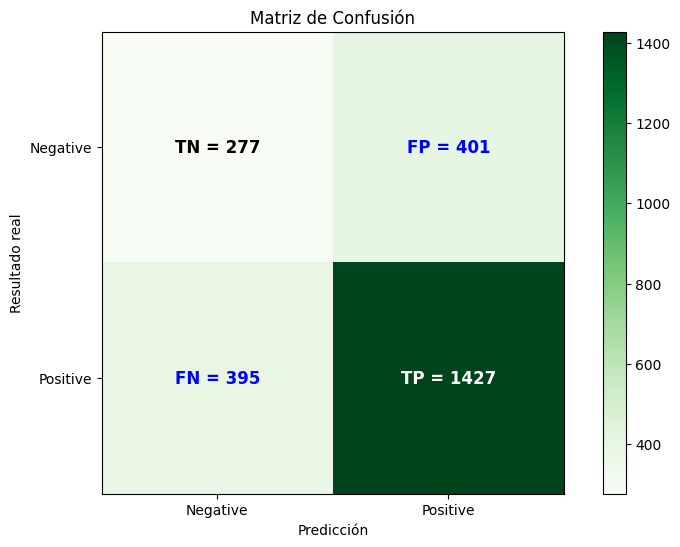

In [26]:
# Porcentaje de entrenamiento mayor

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Se utilizará como "X" todas las variables excepto 'is_english'
X = m_norm.drop('is_english', axis=1)
y = m_norm['is_english']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

clf = DecisionTreeClassifier(random_state=1234)
model2 = clf.fit(X_train, y_train)
y_pred = model2.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Exactitud del modelo con 'accuracy':", accuracy)

# Ahora, para visualizar nuestros resultados, utilizaremos la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)

# Obtenemos los valores de verdaderos y falsos
tn, fp, fn, tp = confusion.ravel()

# Visualizamos la matriz
plt.figure(figsize=(10, 6))
plt.imshow(confusion, cmap='Greens')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Resultado real')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.yticks([0, 1], ['Negative', 'Positive'])
plt.colorbar()

# Mostramos los valores de verdaderos y falsos
plt.text(0, 0, f'TN = {tn}', ha='center', va='center', color='black', fontsize=12, fontweight='bold')
plt.text(1, 1, f'TP = {tp}', ha='center', va='center', color='white', fontsize=12, fontweight='bold')
plt.text(0, 1, f'FN = {fn}', ha='center', va='center', color='blue', fontsize=12, fontweight='bold')
plt.text(1, 0, f'FP = {fp}', ha='center', va='center', color='blue', fontsize=12, fontweight='bold')

plt.show()

Exactitud del modelo con 'accuracy': 0.6893333333333334


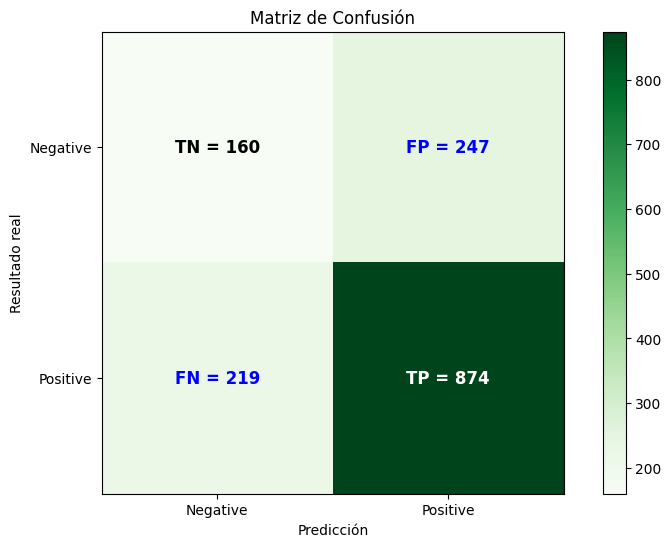

In [27]:
# Porcentaje de entrenamiento menor

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Se utilizará como "X" todas las variables excepto 'is_english'
X = m_norm.drop('is_english', axis=1)
y = m_norm['is_english']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

clf = DecisionTreeClassifier(random_state=1234)
model3 = clf.fit(X_train, y_train)
y_pred = model3.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Exactitud del modelo con 'accuracy':", accuracy)

# Ahora, para visualizar nuestros resultados, utilizaremos la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)

# Obtenemos los valores de verdaderos y falsos
tn, fp, fn, tp = confusion.ravel()

# Visualizamos la matriz
plt.figure(figsize=(10, 6))
plt.imshow(confusion, cmap='Greens')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Resultado real')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.yticks([0, 1], ['Negative', 'Positive'])
plt.colorbar()

# Mostramos los valores de verdaderos y falsos
plt.text(0, 0, f'TN = {tn}', ha='center', va='center', color='black', fontsize=12, fontweight='bold')
plt.text(1, 1, f'TP = {tp}', ha='center', va='center', color='white', fontsize=12, fontweight='bold')
plt.text(0, 1, f'FN = {fn}', ha='center', va='center', color='blue', fontsize=12, fontweight='bold')
plt.text(1, 0, f'FP = {fp}', ha='center', va='center', color='blue', fontsize=12, fontweight='bold')

plt.show()

Nos movimos en un rango de un 5% de diferencia en los % de entrenamiento y la precisión del modelo no se movió mucho.
Se puede apreciar en los resultados de la matriz de confusión, que al disminuir un 5% la cantidad de datos a entrenar, la distribución de predicciones acertadas y no acertadas casi no cambia (874/1500 TP; 1167/2000 TP; 1427/2500 TP)

Ahora, intentaremos lo mismo para las compañías productoras

Exactitud del modelo: 0.9845


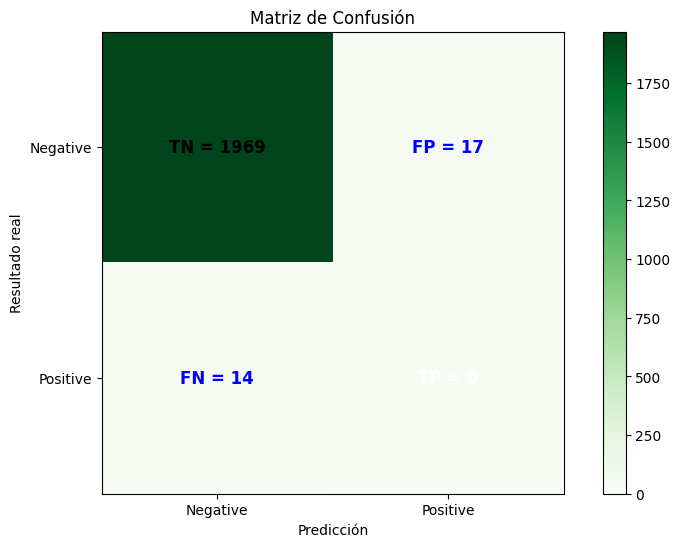

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Se utilizará como "X" todas las variables excepto 'is_marvel'
X = m_norm.drop('is_marvel', axis=1)
y = m_norm['is_marvel']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=1234)
model4 = clf.fit(X_train, y_train)
y_pred = model4.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Exactitud del modelo:", accuracy)

# Ahora, para visualizar nuestros resultados, utilizaremos la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)

# Obtenemos los valores de verdaderos y falsos
tn, fp, fn, tp = confusion.ravel()

# Visualizamos la matriz
plt.figure(figsize=(10, 6))
plt.imshow(confusion, cmap='Greens')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Resultado real')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.yticks([0, 1], ['Negative', 'Positive'])
plt.colorbar()

# Mostramos los valores de verdaderos y falsos
plt.text(0, 0, f'TN = {tn}', ha='center', va='center', color='black', fontsize=12, fontweight='bold')
plt.text(1, 1, f'TP = {tp}', ha='center', va='center', color='white', fontsize=12, fontweight='bold')
plt.text(0, 1, f'FN = {fn}', ha='center', va='center', color='blue', fontsize=12, fontweight='bold')
plt.text(1, 0, f'FP = {fp}', ha='center', va='center', color='blue', fontsize=12, fontweight='bold')

plt.show()

In [29]:
count_marvel = movies_filt['production_companies'].str.contains('Marvel').sum()
print("Cantidad de valores que contienen 'Marvel':", count_marvel)

Cantidad de valores que contienen 'Marvel': 94


Ahora, utilizaremos KNN para evaluar las variables que presentamos anteriormente

Exactitud del modelo: 0.708


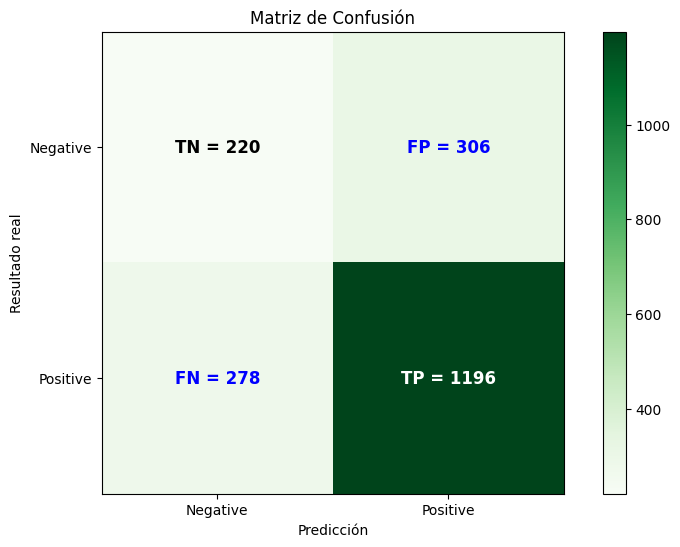

In [30]:
#Para el caso de idioma ID

X = m_norm.drop('is_english', axis=1)
y = m_norm['is_english']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
model5 = knn.fit(X_train, y_train)
y_pred = model5.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Exactitud del modelo:", accuracy)
# Ahora, para visualizar nuestros resultados, utilizaremos la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)

# Obtenemos los valores de verdaderos y falsos
tn, fp, fn, tp = confusion.ravel()

# Visualizamos la matriz
plt.figure(figsize=(10, 6))
plt.imshow(confusion, cmap='Greens')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Resultado real')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.yticks([0, 1], ['Negative', 'Positive'])
plt.colorbar()

# Mostramos los valores de verdaderos y falsos
plt.text(0, 0, f'TN = {tn}', ha='center', va='center', color='black', fontsize=12, fontweight='bold')
plt.text(1, 1, f'TP = {tp}', ha='center', va='center', color='white', fontsize=12, fontweight='bold')
plt.text(0, 1, f'FN = {fn}', ha='center', va='center', color='blue', fontsize=12, fontweight='bold')
plt.text(1, 0, f'FP = {fp}', ha='center', va='center', color='blue', fontsize=12, fontweight='bold')

plt.show()

Exactitud del modelo: 0.9905


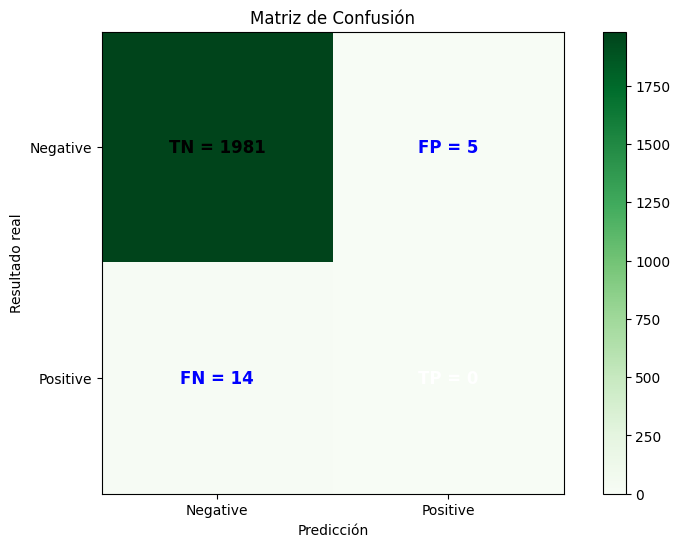

In [31]:
#Para el caso de empresa ID

X = m_norm.drop('is_marvel', axis=1)
y = m_norm['is_marvel']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
model6 = knn.fit(X_train, y_train)
y_pred = model6.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Exactitud del modelo:", accuracy)
# Ahora, para visualizar nuestros resultados, utilizaremos la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)

# Obtenemos los valores de verdaderos y falsos
tn, fp, fn, tp = confusion.ravel()

# Visualizamos la matriz
plt.figure(figsize=(10, 6))
plt.imshow(confusion, cmap='Greens')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Resultado real')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.yticks([0, 1], ['Negative', 'Positive'])
plt.colorbar()

# Mostramos los valores de verdaderos y falsos
plt.text(0, 0, f'TN = {tn}', ha='center', va='center', color='black', fontsize=12, fontweight='bold')
plt.text(1, 1, f'TP = {tp}', ha='center', va='center', color='white', fontsize=12, fontweight='bold')
plt.text(0, 1, f'FN = {fn}', ha='center', va='center', color='blue', fontsize=12, fontweight='bold')
plt.text(1, 0, f'FP = {fp}', ha='center', va='center', color='blue', fontsize=12, fontweight='bold')

plt.show()

Utilizaremos ahora una regresión logística

Exactitud del modelo: 0.737


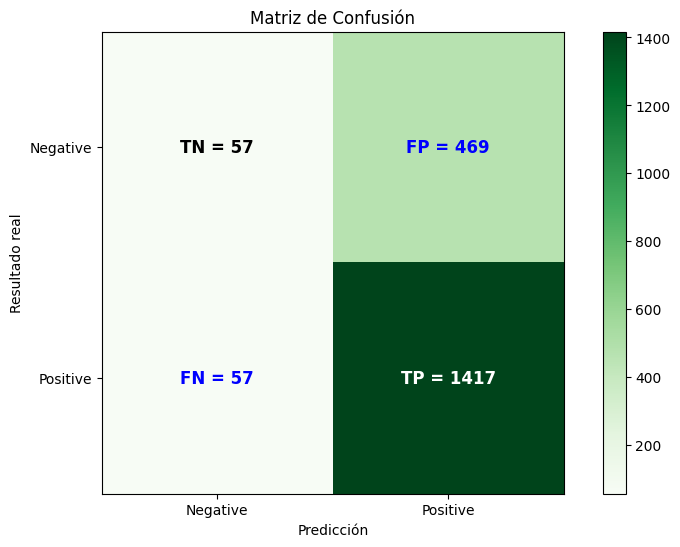

In [32]:
# Caso idioma ID

X = m_norm.drop('is_english', axis=1)
y = m_norm['is_english']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression

lrc = LogisticRegression()

model6 = lrc.fit(X_train, y_train)

y_pred = model6.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Exactitud del modelo:", accuracy)
# Ahora, para visualizar nuestros resultados, utilizaremos la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)

# Obtenemos los valores de verdaderos y falsos
tn, fp, fn, tp = confusion.ravel()

# Visualizamos la matriz
plt.figure(figsize=(10, 6))
plt.imshow(confusion, cmap='Greens')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Resultado real')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.yticks([0, 1], ['Negative', 'Positive'])
plt.colorbar()

# Mostramos los valores de verdaderos y falsos
plt.text(0, 0, f'TN = {tn}', ha='center', va='center', color='black', fontsize=12, fontweight='bold')
plt.text(1, 1, f'TP = {tp}', ha='center', va='center', color='white', fontsize=12, fontweight='bold')
plt.text(0, 1, f'FN = {fn}', ha='center', va='center', color='blue', fontsize=12, fontweight='bold')
plt.text(1, 0, f'FP = {fp}', ha='center', va='center', color='blue', fontsize=12, fontweight='bold')

plt.show()

La cantidad de verdaderos aumentó levemente con respecto a KNN y a DecisionTree, pero visualmente el modelo se ve más preciso(mucho mayor cantidad de verdaderos positivos)

<center>
    <strong>Extrayendo datos desde una API
    </strong>
</center>

En este desafío, se busca trabajar con APIs públicas, obtener información de estas y pasar los datos a un dataframe.
Como el proyecto final está basado en películas, vamos a utilizar la API de películas de OMDB (Open Movie Database).

In [1]:
#Identificaremos los duplicados.

import pandas as pd
import requests

max_results = 100
# Función para obtener datos de la API
def search_movies_all(query, max_results = 100):
    api_key = "aaa259d2"
    base_url = "http://www.omdbapi.com/"
    params = {
        "apikey": api_key,
        "type": "movie",
        "s": query,
        "page": 1
    } 
    all_movies = []
    has_more_results = True
    while has_more_results and len(all_movies) < max_results:
        response = requests.get(base_url, params=params)
        data = response.json()
        if data["Response"] == "True":
            movies = data["Search"]
            all_movies.extend(movies)
            total_results = int(data["totalResults"])
            if len(all_movies) >= total_results or len(all_movies) >= max_results:
                has_more_results = False
            else:
                params["page"] += 1  
        else:
            has_more_results = False
    return all_movies

#Query de película con nombre "Marvel"
query = "Marvel"  
movies_data = search_movies_all(query, max_results)

# Extraer información
movie_list = []
for movie in movies_data:
    title = movie.get("Title", "Unknown Title")
    year = movie.get("Year", "Unknown Year")
    imdb_id = movie.get("imdbID", None)
    movie_list.append({"Title": title, "Year": year, "imdbID": imdb_id})

# Crear un dataframe
df = pd.DataFrame(movie_list)
df.duplicated()
df.drop_duplicates()

,Title,Year,imdbID
0,Captain Marvel,2019,tt4154664
1,Marvel One-Shot: Agent Carter,2013,tt3067038
2,Marvel One-Shot: All Hail the King,2014,tt3438640
3,Marvel One-Shot: Item 47,2012,tt2247732
4,Marvel One-Shot: A Funny Thing Happened on the...,2011,tt2011109
...,...,...,...
95,Marvel Tales to Astonish: Civil War,2014,tt3587710
96,Ham and the Masked Marvel,1916,tt0311247
97,Nadji the Hindoo Marvel,1903,tt0462444
98,Max Marvel Show,1999,tt0810669


In [3]:
#Identificaremos los duplicados.

df.duplicated()


0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Length: 100, dtype: bool

Podemos ver, a partir del código anterior, que el dataframe no presenta duplicados, por lo que no es necesario realizar una limpieza del mismo. Sobre el código original de la query(dos códigos más arriba) se respalda con la sentencia "drop_duplicates" que no hubo ningún duplicado que quitar de la selección.

<Axes: >

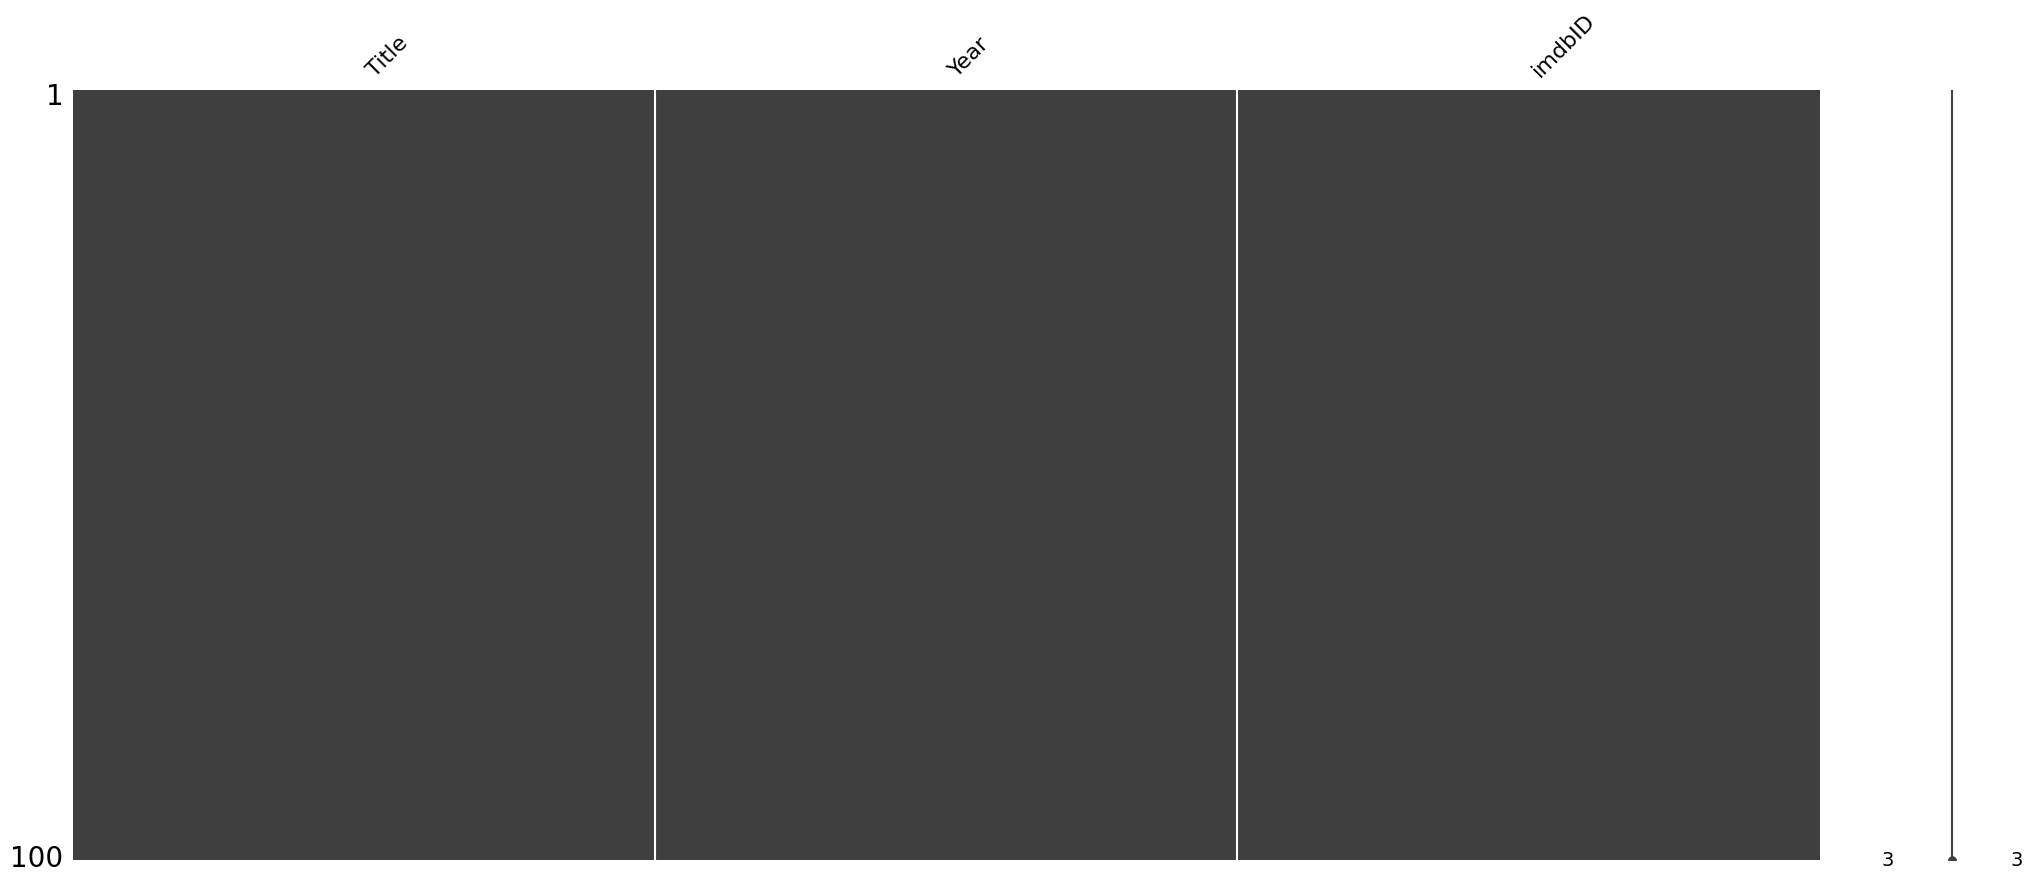

In [2]:
#Usaremos la visualización de missingno para identificar los datos faltantes

import missingno as msno
%matplotlib inline
msno.matrix(df.sample(100))

